
# Logistic Regression

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('./candyData.csv')
df.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [3]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [6]:
# print(df.drop_duplicates().sum())
df.duplicated().sum()

np.int64(0)

In [7]:
df.isna().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [9]:
df.shape

(85, 13)

In [15]:
# y = df['chocolate']
df = df.drop(columns=['competitorname'])

In [16]:
from sklearn.model_selection import train_test_split
trainingSet, testSet = train_test_split(df,test_size=0.2)

In [17]:
train_df = trainingSet
test_df = testSet

In [18]:
x_train = trainingSet.drop(columns=['chocolate'])
y_train = trainingSet['chocolate']
x_test = testSet.drop(columns=['chocolate'])
y_test = testSet['chocolate']

In [19]:
y_test.head()

27    1
57    0
15    0
6     1
12    0
Name: chocolate, dtype: int64

# Data Exploration

In [20]:
y_train.value_counts()

chocolate
0    39
1    29
Name: count, dtype: int64

In [ ]:
import seaborn as sns

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
79,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
69,0,1,0,0,0,0,1,0,1,0.569,0.058,34.578991
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
28,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936


C:\Users\HP\AppData\Local\Temp\ipykernel_10032\2246413274.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "chocolate",data = train_df, palette='Blues_d')


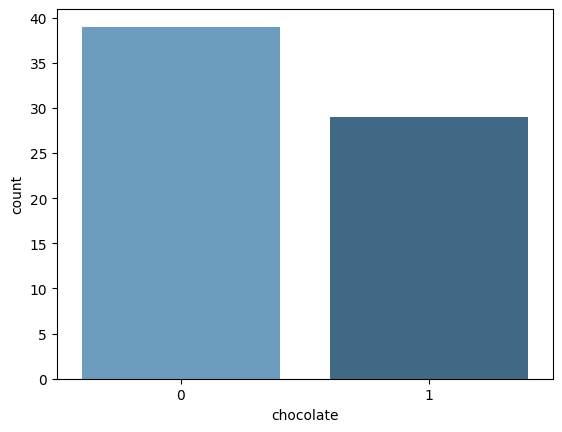

In [29]:
sns.countplot(x = "chocolate",data = train_df, palette='Blues_d')
plt.show()

In [34]:
count_no_choco = len(train_df[train_df['chocolate'] == 0])
count_choco = len(train_df[train_df['chocolate'] == 1])
pct_pf_no_choco = count_no_choco/(count_no_choco + count_choco)*100
print("Percentage of no chocolate is ", pct_pf_no_choco)
pct_of_choco = count_choco/(count_no_choco + count_choco)*100
print("Percentage ofchocolate ", pct_of_choco)

Percentage of no chocolate is  57.35294117647059
Percentage ofchocolate  42.64705882352941


# Model Development and Prediction

Import the Scikit learn logistic regression module fit model on the  reain set using fit() the perform prediction on tst set using prediction

In [36]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [38]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[9, 0],
       [1, 7]])

Visualization

In [40]:
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred)*100)
print("Precission: ",metrics.precision_score(y_test,y_pred)*100)
print("Recall:", metrics.recall_score(y_test,y_pred)*100)

Accuracy:  94.11764705882352
Precission:  100.0
Recall: 87.5
